In [1]:
!nvidia-smi

Thu Feb 15 19:23:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A40                     On  | 00000000:01:00.0 Off |                    0 |
|  0%   33C    P8              24W / 300W |      4MiB / 46068MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def getAccuracy(tempDF):
    counter = 0
    for pred, truth in zip(tempDF['Predicted Labels'], tempDF['True_label']):
        if pred == truth:
            counter +=1
    accuracy = counter/len(tempDF)
    return accuracy

def counter(tempDF):
    tempDict = {}
    for label in tempDF['Predicted Category']:
        if label in tempDict:
            tempDict[label] += 1
        else:
            tempDict[label] = 1
    columns =['Walking', 'Fishing', 'Photography', 'Hiking','Children','Running','Badminton','Basketball', 'Football','Swimming','Golf','Dance','Others']
    for col in columns:
        if col not in tempDict:
            tempDict[col] = 0
        print(f'{col}: {tempDict[col]}')
    
    # Extract values corresponding to sorted categories
    values = [tempDict[col] for col in columns]
    
    # Extract keys and values from the dictionary
    # categories = list(tempDict.keys())
    # values = list(tempDict.values())
    plt.figure(figsize=(len(columns), 6))
    # Create a bar graph
    bars = plt.bar(columns, values, color='blue')
    plt.xticks(rotation=45, ha='right')
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Bar Graph of Categories')
    plt.tight_layout()  # Adjust layout to prevent cropping
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
                 ha='center', va='bottom')
    # Show the plot
    plt.show()
    
def combineCSV(directory):

    # List to store DataFrame objects for each CSV file
    dfs = []

    # Iterate over each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            # Read CSV file into a DataFrame and append to the list
            df = pd.read_csv(os.path.join(directory, filename))
            dfs.append(df)

    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(directory+'combined(2023-2013)(1000).csv', index=False)

    print('Combined CSV file created successfully.')

./Task 9/combined(2023-2013)(1000).csv
Walking: 2554
Fishing: 79
Photography: 633
Hiking: 151
Children: 186
Running: 1003
Badminton: 69
Basketball: 74
Football: 98
Swimming: 301
Golf: 88
Dance: 1318
Others: 3544


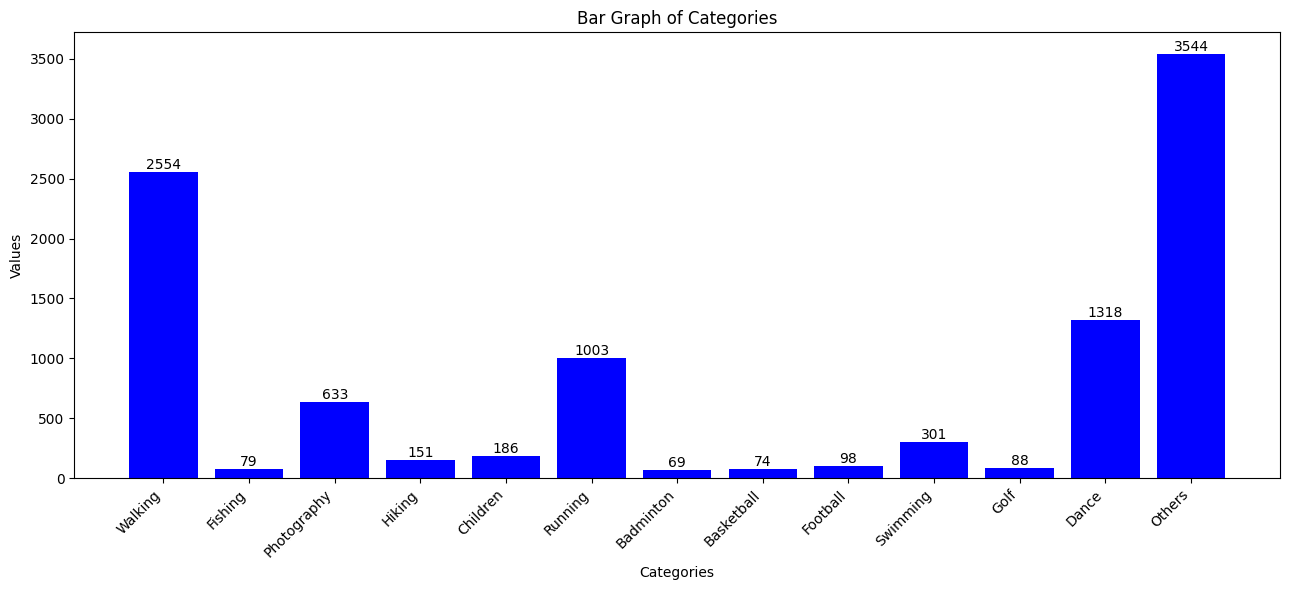

In [14]:
import os
directory = './Task 9/'
# dfs = []

# # Iterate over each CSV file in the directory
# for file in os.listdir(directory):
#     if file.endswith('.csv'):
#         file_path = os.path.join(directory, file)
        
#         # Read the CSV file into a DataFrame and append it to the list
#         df = pd.read_csv(file_path)
#         dfs.append(df)

# # Concatenate all DataFrames in the list into a single DataFrame
# combined_df = pd.concat(dfs, ignore_index=True)
temp_dict={}
file = directory + "combined(2023-2013)(1000).csv"
temp_df = pd.read_csv(file)

# interested_ls = ["Basketball","Fishing","Hiking","Football","Badminton","Children","Running",'Walking','Photography','Swimming',]  
# for label,text in zip(temp_df['Predicted Category'],temp_df['text']):
#     if label in interested_ls:
#         if label in temp_dict:
#             temp_dict[label].append(text)
#         else:
#             temp_dict[label] = [text]
# for k in temp_dict:
#     print(k)
#     for v in temp_dict[k]:
#         print(v)
#     print()

print(file)
counter(temp_df)

In [13]:
file_path = directory+"Llama_task9_Self_labelled(0,1,2)(football prompt).csv"
print(f'Task9 (0,1,2): {getAccuracy(pd.read_csv(file_path))}')
counter(pd.read_csv(file_path))

FileNotFoundError: [Errno 2] No such file or directory: './Task 9/Llama_task9_Self_labelled(0,1,2)(football prompt).csv'

In [9]:
directory = './Task 9/'
combineCSV(directory)

Combined CSV file created successfully.


## Search terms

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

def searchTerms(file):
    df = pd.read_csv(file)
    # Remove duplicate rows from the combined DataFrame
    df = df.drop_duplicates()
    # Reset the index of the combined DataFrame
    df = df.reset_index(drop=True)
    
    temp_dict = {'Walking':['walk'], # will include walking 
                 'Fishing':['fish'], # will include fishing
                 'Photography':['photo','picture'], 
                 'Hiking':['hike','hiking'],
                 'Children':['child','kid'], # will include children, kids, kidz
                 'Running':['run'], # will include running
                 'Badminton':['badminton'],
                 'Basketball':['basketball','bball'], 
                 'Football':['soccer','football'],
                 'Swimming':['swim'], # will include swimming
                 'Golf':['golf'], # will include golfing
                 'Dance':['danc'] # will include dancing
                }
    total = len(df)
    print(f'total: {total}')
    # Define the file path
    csv_file = 'data.csv'

    # Open the CSV file in write mode
    with open(csv_file, mode='w', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)
        header = ["Category","Sensitivity","Specificity","Positive Predictive Value","Negative Predictive Value", "Labelled_neg","Labelled_pos", "Pred_neg", "Pred_pos", "True_pos","True_neg","False_pos","False_neg"]
        writer.writerow(header)
        for k, val in temp_dict.items():
            pred_pos = df[df['Predicted Category'].str.contains(k, case=False)]
            pred_neg = df[~df['Predicted Category'].str.contains(k, case=False)]

            combined_df = pd.DataFrame()

            # Loop through each value in val
            for v in val:
                # Filter the original DataFrame df based on the condition
                search_df = df[df['text'].str.contains(v, case=False)]

                # Append the filtered DataFrame to the combined_df
                combined_df= pd.concat([combined_df, search_df],ignore_index=True)

            # Remove duplicate rows from the combined DataFrame
            combined_df = combined_df.drop_duplicates()

            # Reset the index of the combined DataFrame
            combined_df = combined_df.reset_index(drop=True) # this are the labelled positives

            # Merge DataFrames df1 and df2 with indicator
            merged = pd.merge(df, combined_df, how='outer', indicator=True)

            # Filter rows where indicator is 'left_only' (only in df1)
            df_not_intersect = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge']) # this are the labelled negatives

            true_pos = combined_df[combined_df['Predicted Category'].str.contains(k, case=False)] # these are true positives
            false_neg = combined_df[~combined_df['Predicted Category'].str.contains(k, case=False)] # these are false neg

            false_pos = df_not_intersect[df_not_intersect['Predicted Category'].str.contains(k, case=False)] #these are false positives
            true_neg = df_not_intersect[~df_not_intersect['Predicted Category'].str.contains(k, case=False)] #these are true negatives    

            # Display the filtered DataFram
            no_of_pred_pos = len(pred_pos)
            no_of_pred_neg = len(pred_neg)

            no_of_labelled_pos = len(combined_df)
            no_of_labelled_neg = len(df_not_intersect)

            no_of_true_pos = len(true_pos)
            no_of_true_neg = len(true_neg)
            no_of_false_neg = len(false_neg)
            no_of_false_pos = len(false_pos)
            
            
            print(f'Category: {k}')

            print(f'no_of_labelled_neg: {no_of_labelled_neg}')
            print(f'no_of_labelled_pos: {no_of_labelled_pos}')

            print(f'no_of_predicted_neg: {no_of_pred_neg}')
            print(f'no_of_predicted_pos: {no_of_pred_pos}')

            print(f'no_of_true_pos: {no_of_true_pos}')        
            print(f'no_of_true_neg: {no_of_true_neg}')

            print(f'no_of_false_neg: {no_of_false_neg}')
            print(f'no_of_false_pos: {no_of_false_pos}')

            print(f'Sensitivity: {no_of_true_pos/(no_of_true_pos+no_of_false_neg)}')
            print(f'Specificity: {no_of_true_neg/(no_of_true_neg+no_of_false_pos)}')
            print(f'Positive Predictive Value: {no_of_true_pos/(no_of_true_pos+no_of_false_pos)}')
            print(f'Negative Predictive Value: {no_of_true_neg/(no_of_true_neg+no_of_false_neg)}')
            sensitivity = no_of_true_pos/(no_of_true_pos+no_of_false_neg)
            specificity = no_of_true_neg/(no_of_true_neg+no_of_false_pos)
            pos_pred_val = no_of_true_pos/(no_of_true_pos+no_of_false_pos)
            neg_pred_val = no_of_true_neg/(no_of_true_neg+no_of_false_neg)
            ["Category",
             "Sensitivity",
             "Specificity",
             "Positive Predictive Value",
             "Negative Predictive Value",
             "Labelled_neg",
             "Labelled_pos",
             "Pred_neg",
             "Pred_pos",
             "True_pos",
             "True_neg",
             "False_pos",
             "False_neg"]
            row = [k,
                   sensitivity,
                   specificity,
                   pos_pred_val,
                   neg_pred_val,
                   no_of_labelled_neg,
                   no_of_labelled_pos,
                   no_of_pred_neg,
                   no_of_pred_pos,
                   no_of_true_pos,
                   no_of_true_neg,
                   no_of_false_pos,
                   no_of_false_neg
                  ]
            writer.writerow(row)


# if we treat search_df as true labels of ones, and filtered_df as predicted labels, we can find true positives and false positives

directory = './Task 9/'
file = directory + 'combined(2023-2013)(1000).csv'
searchTerms(file)

total: 10045
Category: Walking
no_of_labelled_neg: 7910
no_of_labelled_pos: 2135
no_of_predicted_neg: 7505
no_of_predicted_pos: 2540
no_of_true_pos: 1439
no_of_true_neg: 6809
no_of_false_neg: 696
no_of_false_pos: 1101
Sensitivity: 0.6740046838407494
Specificity: 0.8608091024020228
Positive Predictive Value: 0.5665354330708662
Negative Predictive Value: 0.9072618254497002
Category: Fishing
no_of_labelled_neg: 9928
no_of_labelled_pos: 117
no_of_predicted_neg: 9966
no_of_predicted_pos: 79
no_of_true_pos: 77
no_of_true_neg: 9926
no_of_false_neg: 40
no_of_false_pos: 2
Sensitivity: 0.6581196581196581
Specificity: 0.999798549556809
Positive Predictive Value: 0.9746835443037974
Negative Predictive Value: 0.9959863536022476
Category: Photography
no_of_labelled_neg: 8813
no_of_labelled_pos: 1232
no_of_predicted_neg: 9425
no_of_predicted_pos: 620
no_of_true_pos: 591
no_of_true_neg: 8784
no_of_false_neg: 641
no_of_false_pos: 29
Sensitivity: 0.4797077922077922
Specificity: 0.9967094065584932
Positi